# SCİKİT-LEARN

Kaynak: http://www.veridefteri.com/2017/11/23/scikit-learn-ile-veri-analitigine-giris/

## Sayi Siniflandirma

In [1]:
#Rakamlar veri kümesini yüklüyoruz.
from sklearn.datasets import load_digits
#numpy paketini yüklüyoruz.
import numpy as np
#Veri kümesini ikiye bölmek için kullanıyoruz.
from sklearn.model_selection import train_test_split
#Resimleri incelemek için matplotlib kullanıyoruz.
%matplotlib inline
import matplotlib.pyplot as plt

#Veri kümesini etiket değerleriyle birlikte yükleyelim.
X,y = load_digits(return_X_y=True)
print('Verinin boyutları (Gözlem, öznitelik) = ' + str(np.shape(X)))
print('Etiketlerin boyutları (Gözlem) = ' + str(np.shape(y)))

Verinin boyutları (Gözlem, öznitelik) = (1797, 64)
Etiketlerin boyutları (Gözlem) = (1797,)


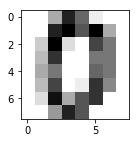

Etiket: 0


In [2]:
rakam1 = X[0]
rakam1 = np.reshape(rakam1, (8,8))

plt.figure(figsize= (2,2))
plt.imshow(rakam1, cmap="gray_r")
plt.show()
etiket1 = y[0]
print('Etiket: ' + str(etiket1))

In [3]:
#3 ve 8 rakamlarını seçmek için filtreleme kullanacağız.
#Filtrelemeyi etiket değerlerine (y) bakarak yapacağız. 
#Etiket değeri beşe bölündüğünde kalan üç ise bu gözlemleri veri kümesinde bırakıyoruz.
X= X[y%5 == 3]
y= y[y%5 == 3]

#Son olarak etiketleri 0 ve 1 değerlerine çevirelim.
#Rakam 3 ise etiket 0, 8 ise 1 olacak.
y = (y==8)*1
print('Verinin boyutları (Gözlem, öznitelik) = ' + str(np.shape(X)))
print('Etiketlerin boyutları (Gözlem) = ' + str(np.shape(y)))

Verinin boyutları (Gözlem, öznitelik) = (357, 64)
Etiketlerin boyutları (Gözlem) = (357,)


In [4]:
#Stratify değeri veri kümesinin etiket yüzdelerini korumak için kullanılıyor.
#Öğrenme veri kümesini küçük tutarak sonuçların çok iyi olmasını engelliyoruz.
#random_state değeri sonuçların her seferinde aynı çıkmasını sağlamak için kullanılıyor.
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.5, test_size = 0.5, random_state = 0, stratify = y)

print('Öğrenme verisinin boyutları (Gözlem, öznitelik) = ' + str(np.shape(X_train)))
print('Sınama verisinin boyutları (Gözlem, öznitelik) = ' + str(np.shape(X_test)))

Öğrenme verisinin boyutları (Gözlem, öznitelik) = (178, 64)
Sınama verisinin boyutları (Gözlem, öznitelik) = (179, 64)


In [5]:
#Karar ağaçları
from sklearn.tree import DecisionTreeClassifier
#Rastgele orman
from sklearn.ensemble import RandomForestClassifier

#Karar ağacı modelini oluşturalım. 
#random_state değeri sayesinde sonuçların rassal olarak değişmemesini sağlıyoruz.
dt = DecisionTreeClassifier(random_state = 0)

#Rastgele orman modelini oluşturalım.
rf = RandomForestClassifier(random_state = 0)

In [6]:
#Modellerin öğrenmesini sağlayalım.
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [7]:
#Sınama verisinin etiketlerini elde edelim.
y_pred_dt = dt.predict(X_test)
#Sınama veri kümesinin sınıflara ait olma olasılıklarını alalım.
y_pred_proba_dt = dt.predict_proba(X_test)

#Aynı adımları rastgele orman yöntemi için tekrarlayalım.
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)

In [8]:
#Sonuçları değerlendirmek için aşağıdaki fonksiyonları kullanacağız.
from sklearn.metrics import roc_auc_score, accuracy_score
#İsabetlilik değeri için etiketlere ihtiyacımız var.
print('Karar ağacı isabetlilik değeri: ' + str(accuracy_score(y_pred_dt, y_test)))
print('Rastgele orman isabetlilik değeri: ' + str(accuracy_score(y_pred_rf, y_test)))

#Eğri altı alan değeri için etiketlerin olasılıklarına ihtiyacımız var.
#Bu amaçla etiketlerin 1 değerinde olma yüzdelerini kullanacağız.
print('Karar ağacı eğri altı alan değeri: ' + str(roc_auc_score(y_test, y_pred_proba_dt[:,1])))
print('Rastgele orman eğri altı alan değeri: ' + str(roc_auc_score(y_test, y_pred_proba_rf[:,1])))

Karar ağacı isabetlilik değeri: 0.927374301676
Rastgele orman isabetlilik değeri: 0.960893854749
Karar ağacı eğri altı alan değeri: 0.928723138431
Rastgele orman eğri altı alan değeri: 0.997876061969


## Kanser versinin neural network ile siniflandirilmasi

In [9]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [10]:
# Print full description by running:
# print(cancer['DESCR'])
# 569 data points with 30 features
cancer['data'].shape

(569, 30)

In [11]:
X = cancer['data']
y = cancer['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Multi-Layer Perceptron Classifier model
from sklearn.neural_network import MLPClassifier

In [15]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [16]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [17]:
predictions = mlp.predict(X_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[61  1]
 [ 2 79]]


In [19]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.97      0.98      0.98        62
          1       0.99      0.98      0.98        81

avg / total       0.98      0.98      0.98       143



## Neural Network Classifictaion for Wine dataset

In [20]:
import pandas as pd
wine = pd.read_csv('wine_data.csv',names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", 
                            "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", 
                            "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])

In [21]:
wine.head()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [22]:
wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cultivator,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alchol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_Ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Falvanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [23]:
# 178 data points with 13 features and 1 label column
wine.shape

(178, 14)

In [24]:
X = wine.drop('Cultivator',axis=1)
y = wine['Cultivator']

In [25]:
y.unique()

array([1, 2, 3])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Data Processing  - Normalize your data

Kaynak: https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/

> The neural network in Python may have difficulty converging before the maximum number of iterations allowed if the data is not normalized. Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. Note that you must apply the same scaling to the test set for meaningful results. There are a lot of different methods for normalization of data, we will use the built-in StandardScaler for standardization.

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation= 'logistic', hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [29]:
# help(MLPClassifier)

In [30]:
predictions = mlp.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[13  0  0]
 [ 0 17  1]
 [ 0  0 14]]


In [32]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        13
          2       1.00      0.94      0.97        18
          3       0.93      1.00      0.97        14

avg / total       0.98      0.98      0.98        45



## Toydata ile Calisma

Datayi biz uretelim.


In [33]:
# help(np.random.randint)

In [34]:
# 1 ile 10 arasinda 1000 adet x1 ve x2
X = np.random.randint(10, size=(1000,2))
print(X[1:6,])

# ilk kolon ikinci kolondan buyukse, y=1
y = (X[:,0] > X[:,1]) * 1
print(y[1:6,])

[[9 6]
 [1 7]
 [1 2]
 [3 8]
 [3 1]]
[1 0 0 0 1]


In [35]:
# Datayi train ve test olarka ayir
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)


# Datayi normalize et 
#.      Standardize features by removing the mean and scaling to unit variance
#.      Centering and scaling happen independently on each feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# yapay ogrenme
# Agin katmanlari 2 (girdi), 3(hidden) , 1(cikti) 
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation= 'logistic', hidden_layer_sizes=(3),max_iter=500)
mlp.fit(X_train,y_train)

# tahminde bulun
predictions = mlp.predict(X_test)

# sonuclara bak
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[[143   0]
 [  0 107]]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [36]:
type(mlp.coefs_)

list

In [37]:
mlp.coefs_

[array([[-1.85329083,  2.25030248,  1.92014942],
        [ 1.78952733, -2.14003606, -2.17519586]]), array([[-2.13786945],
        [ 1.80187154],
        [ 1.55998736]])]

In [38]:
W, b = [], []
for c, i in zip(mlp.coefs_, mlp.intercepts_):
    W.append(c.T)
    b.append(i.reshape((len(i), 1)))

In [39]:
# Agirliklar (girdi-ara) 3x2 matris
# Agirliklar (ara-cikti) 1x3 matris
print("agirlik :")
for w in W:
    print(w, "\n")
    
print("bias :")
for bb in b:
    print(bb, "\n")

agirlik :
[[-1.85329083  1.78952733]
 [ 2.25030248 -2.14003606]
 [ 1.92014942 -2.17519586]] 

[[-2.13786945  1.80187154  1.55998736]] 

bias :
[[ 0.38466407]
 [-0.44912673]
 [-0.42560835]] 

[[-0.65571131]] 



In [40]:
# help(StandardScaler)
veri =  [[9, 1],
         [8,1],
         [6,5],
         [5,6],
        [1,9]]
normalizeVeri  = scaler.transform(veri)
print(normalizeVeri)

tahmin = mlp.predict(normalizeVeri)
print("Tahmin: \n", tahmin)

[[ 1.55070707 -1.24873511]
 [ 1.20186775 -1.24873511]
 [ 0.5041891   0.18604288]
 [ 0.15534978  0.54473738]
 [-1.24000751  1.62082086]]
Tahmin: 
 [1 1 1 0 0]


## Elle deneme


In [41]:
#### Yardimci Fonksiyonlar
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))
def sigmoid_turevi(z):
    return sigmoid(z)*(1-sigmoid(z))

def ileribesleme(a, agirlik, bias, goster = False):
    """Katman katman yeni a degerleri hesaplaniyor
    Girdinin transpozu (satirlar ozellik, sutunlar gozlem) a olarak verilmeli. 
    """
    for w, b in zip(agirlik, bias):
        if goster:
            print("w:\n", w, "\n")
            print("a:\n", a, "\n")
            print("np.dot(w, a):\n", np.dot(w, a), "\n")
            print("b:\n", b, "\n")
            print("a = sigmoid(np.dot(w, a)+b):\n", sigmoid(np.dot(w, a)+b), "\n\n\n")
        z = np.dot(w, a)+b
        a = sigmoid(z)   
    return a

In [42]:
ileribesleme(normalizeVeri.T, W, b, goster = True)

w:
 [[-1.85329083  1.78952733]
 [ 2.25030248 -2.14003606]
 [ 1.92014942 -2.17519586]] 

a:
 [[ 1.55070707  1.20186775  0.5041891   0.15534978 -1.24000751]
 [-1.24873511 -1.24873511  0.18604288  0.54473738  1.62082086]] 

np.dot(w, a):
 [[-5.10855679 -4.46205607 -0.60148022  0.6869141   5.19859778]
 [ 6.16189812  5.37690412  0.73643951 -0.81617364 -6.25900707]
 [ 5.69383272  5.0240091   0.56343871 -0.8866157  -5.90660255]] 

b:
 [[ 0.38466407]
 [-0.44912673]
 [-0.42560835]] 

a = sigmoid(np.dot(w, a)+b):
 [[ 0.00880237  0.01666905  0.44600731  0.74489692  0.99625381]
 [ 0.99670737  0.99280949  0.57133813  0.22006281  0.00121945]
 [ 0.99487366  0.99003243  0.53440314  0.21211492  0.00177494]] 



w:
 [[-2.13786945  1.80187154  1.55998736]] 

a:
 [[ 0.00880237  0.01666905  0.44600731  0.74489692  0.99625381]
 [ 0.99670737  0.99280949  0.57133813  0.22006281  0.00121945]
 [ 0.99487366  0.99003243  0.53440314  0.21211492  0.00177494]] 

np.dot(w, a):
 [[ 3.32911066  3.29771699  0.90963466 -

array([[ 0.93543863,  0.93351655,  0.56314193,  0.17934637,  0.05838125]])

In [43]:
(ileribesleme(normalizeVeri.T, W, b) > 0.5) * 1

array([[1, 1, 1, 0, 0]])

In [44]:
tahmin == (ileribesleme(normalizeVeri.T, W, b) > 0.5) * 1

array([[ True,  True,  True,  True,  True]], dtype=bool)

## YSA sifirdan yazalim

In [45]:
def ag(katmanlar):
    b = [np.random.randn(k, 1) for k in katmanlar[1:]] # bias degerleri (ilk katman haric)
    W = [np.random.randn(k2, k1) for k1, k2 in zip(katmanlar[:-1],katmanlar[1:])]
    return W, b

katmanlar = [2, 3, 1]
agirlik, bias = ag(katmanlar)

print("agirlik :")
for w in agirlik:
    print(w, "\n")
    
print("bias :")
for b in bias:
    print(b, "\n")

agirlik :
[[ 1.37046534  0.27524598]
 [-0.36455967  1.18753378]
 [-1.98587646 -1.37998052]] 

[[-0.27087958  0.16222539 -0.92883621]] 

bias :
[[ 0.92512981]
 [-0.08426793]
 [ 0.22534963]] 

[[ 0.05232191]] 



In [46]:
ileribesleme(normalizeVeri.T, agirlik, bias)

array([[ 0.39866315,  0.3688293 ,  0.41575316,  0.41584206,  0.3819714 ]])

In [48]:
tahmin == (ileribesleme(normalizeVeri.T, agirlik, bias) > 0.5) * 1

array([[False, False, False,  True,  True]], dtype=bool)